<a href="https://colab.research.google.com/github/MrSanad26/DataAnalysis/blob/main/DataA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling --upgrade


In [5]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

<ipython-input-5-eaadc836be37>:13: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [6]:
# Loading data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Evc/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# About data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Data mathematical information
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


ما هو عدد العملاء الذين رحلوا عن الشركة وعددهم بالنسبة لإجمالي العملاء؟

In [11]:
# Assuming you have a DataFrame called 'df' containing the Telco customer data
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = churned_customers / total_customers
print(f"Total customers: {total_customers}")
print(f"Churned customers: {churned_customers}")
print(f"Churn rate: {churn_rate}")


Total customers: 7043
Churned customers: 1869
Churn rate: 0.2653698707936959


هل هناك توازن في توزيع العملاء الذين رحلوا والعملاء الذين بقوا من حيث النسبة بينهما؟

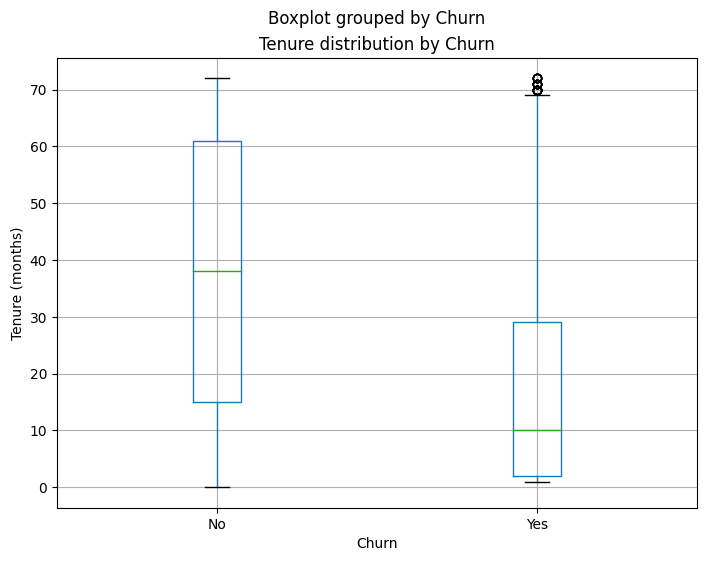

No     5174
Yes    1869
Name: Churn, dtype: int64


In [12]:
df.boxplot(column='tenure', by='Churn', figsize=(8, 6))
plt.xlabel("Churn")
plt.ylabel("Tenure (months)")
plt.title("Tenure distribution by Churn")
plt.show()

churn_counts = df['Churn'].value_counts()
print(churn_counts)

ما هي الخدمات الأكثر تأثرًا بقرار العملاء بالرحيل؟

In [13]:
services_churn_relation = df.groupby(['InternetService', 'PhoneService', 'Churn'])['customerID'].count().unstack()
print(services_churn_relation)

Churn                           No   Yes
InternetService PhoneService            
DSL             No             512   170
                Yes           1450   289
Fiber optic     Yes           1799  1297
No              Yes           1413   113


Is the churn increases as the total charges increases?

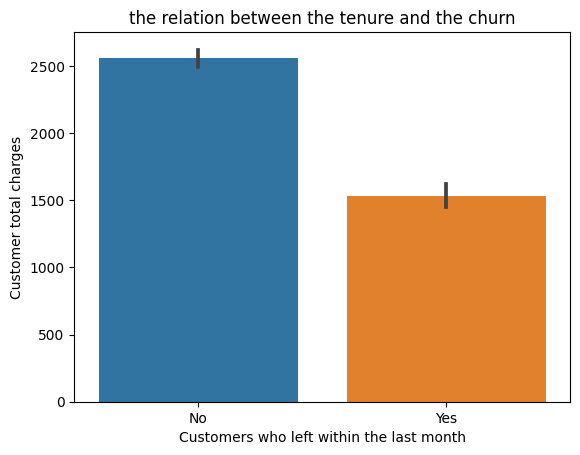

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
sns.barplot(data=df, x="Churn", y="TotalCharges")
plt.xlabel('Customers who left within the last month')
plt.ylabel('Customer total charges')
plt.title('the relation between the tenure and the churn');

Does the customer who pays the most are staying?

In [19]:
df[(df['Churn']=='Yes') & (df['TotalCharges']>=6000)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
104,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes
339,1343-EHPYB,Male,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.40,6603.00,Yes
402,0979-PHULV,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,Yes
445,7752-XUSCI,Female,0,No,No,60,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,6396.45,Yes
609,3419-SNJJD,Female,1,Yes,No,65,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),105.25,6786.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,3090-HAWSU,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),111.60,6876.05,Yes
6853,9079-YEXQJ,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,111.10,6014.85,Yes
6945,6797-LNAQX,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,Yes
6972,6664-FPDAC,Female,1,No,No,56,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,111.95,6418.90,Yes


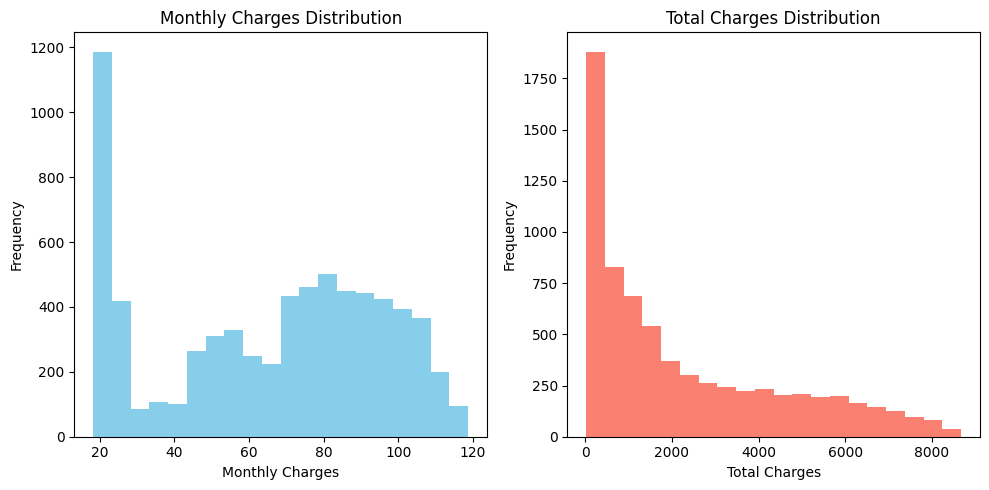

In [20]:
# رسم توزيع أعمدة "MonthlyCharges" و "TotalCharges"
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['MonthlyCharges'], bins=20, color='skyblue')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['TotalCharges'], bins=20, color='salmon')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


 حساب أعلى قيمة وأقل قيمة والمتوسط للعملاء الذين راحلوا في كل من "MonthlyCharges" و "TotalCharges"

In [21]:
churned_customers = df[df['Churn'] == 'Yes']
churned_monthly_charges_max = churned_customers['MonthlyCharges'].max()
churned_monthly_charges_min = churned_customers['MonthlyCharges'].min()
churned_monthly_charges_mean = churned_customers['MonthlyCharges'].mean()

churned_total_charges_max = churned_customers['TotalCharges'].astype(float).max()
churned_total_charges_min = churned_customers['TotalCharges'].astype(float).min()
churned_total_charges_mean = churned_customers['TotalCharges'].astype(float).mean()

print("Monthly Charges Statistics for Churned Customers:")
print(f"Max: {churned_monthly_charges_max}")
print(f"Min: {churned_monthly_charges_min}")
print(f"Mean: {churned_monthly_charges_mean}")

print("\nTotal Charges Statistics for Churned Customers:")
print(f"Max: {churned_total_charges_max}")
print(f"Min: {churned_total_charges_min}")
print(f"Mean: {churned_total_charges_mean}")

Monthly Charges Statistics for Churned Customers:
Max: 118.35
Min: 18.85
Mean: 74.44133226324237

Total Charges Statistics for Churned Customers:
Max: 8684.8
Min: 18.85
Mean: 1531.7960941680042


حساب أعلى قيمة وأقل قيمة والمتوسط للعملاء الذين لم يراحلوا في كل من "MonthlyCharges" و "TotalCharges"

In [22]:
non_churned_customers = df[df['Churn'] == 'No']
non_churned_monthly_charges_max = non_churned_customers['MonthlyCharges'].max()
non_churned_monthly_charges_min = non_churned_customers['MonthlyCharges'].min()
non_churned_monthly_charges_mean = non_churned_customers['MonthlyCharges'].mean()

non_churned_total_charges_max = non_churned_customers['TotalCharges'].max()
non_churned_total_charges_min = non_churned_customers['TotalCharges'].min()
non_churned_total_charges_mean = non_churned_customers['TotalCharges'].mean()

print("\nMonthly Charges Statistics for Non-Churned Customers:")
print(f"Max: {non_churned_monthly_charges_max}")
print(f"Min: {non_churned_monthly_charges_min}")
print(f"Mean: {non_churned_monthly_charges_mean}")

print("\nTotal Charges Statistics for Non-Churned Customers:")
print(f"Max: {non_churned_total_charges_max}")
print(f"Min: {non_churned_total_charges_min}")
print(f"Mean: {non_churned_total_charges_mean}")



Monthly Charges Statistics for Non-Churned Customers:
Max: 118.75
Min: 18.25
Mean: 61.26512369540008

Total Charges Statistics for Non-Churned Customers:
Max: 8672.45
Min: 18.8
Mean: 2555.344141003293


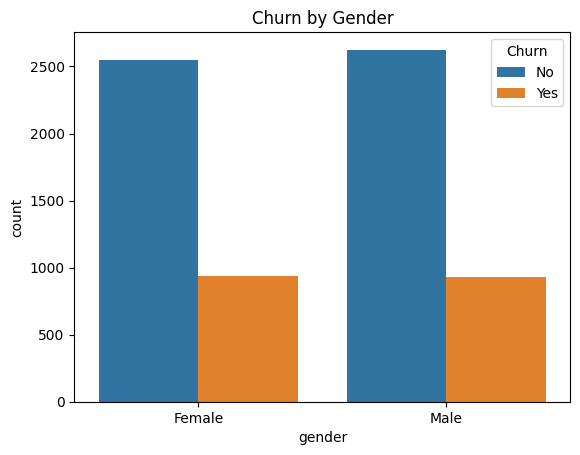

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم الشريط الشرطي باستخدام countplot
sns.countplot(x='gender', hue='Churn', data=df)

# تعيين عنوان للصندوق
plt.title('Churn by Gender')

# عرض الصندوق
plt.show()


What is the most user internet service?

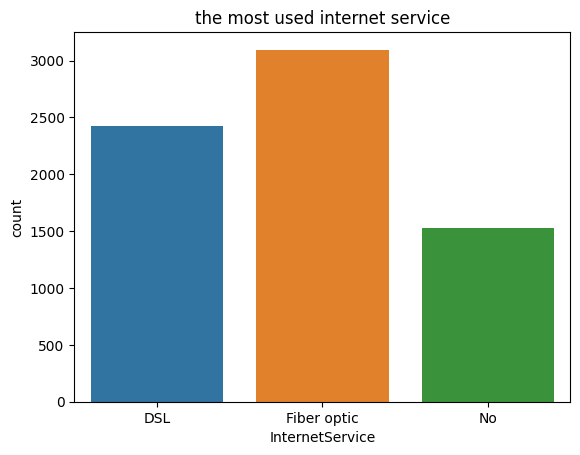

In [24]:
sns.countplot(data=df, x='InternetService')
plt.title('the most used internet service');

does the partner culomn effect the churn?

In [25]:
df[(df['Churn']=='Yes') & (df['Partner']=='Yes')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,6583-QGCSI,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35,Yes
6996,4174-LPGTI,Female,0,Yes,Yes,41,Yes,No,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),66.50,2728.60,Yes
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes


What is the relation between the tenure and the churn?

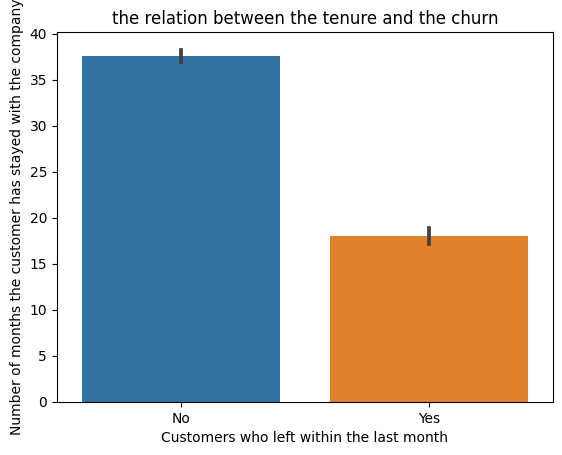

In [26]:
sns.barplot(data=df, x="Churn", y="tenure")
plt.xlabel('Customers who left within the last month')
plt.ylabel('Number of months the customer has stayed with the company')
plt.title('the relation between the tenure and the churn');

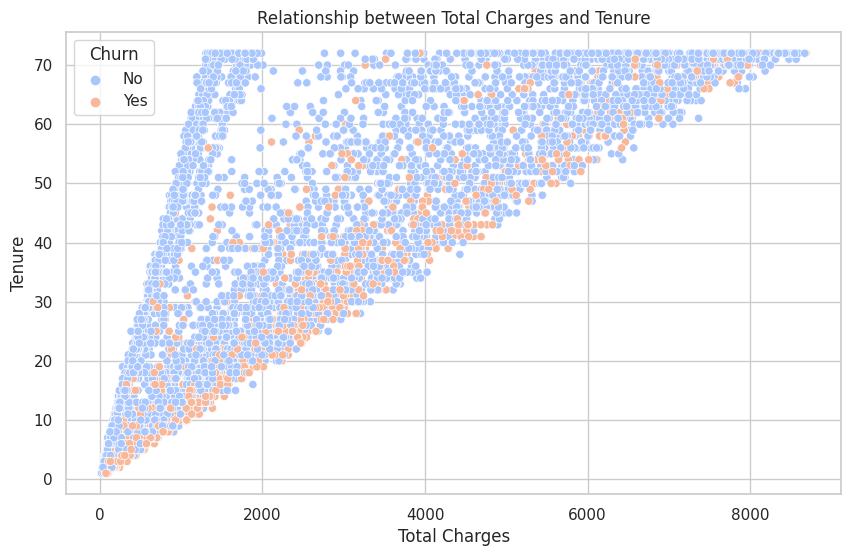

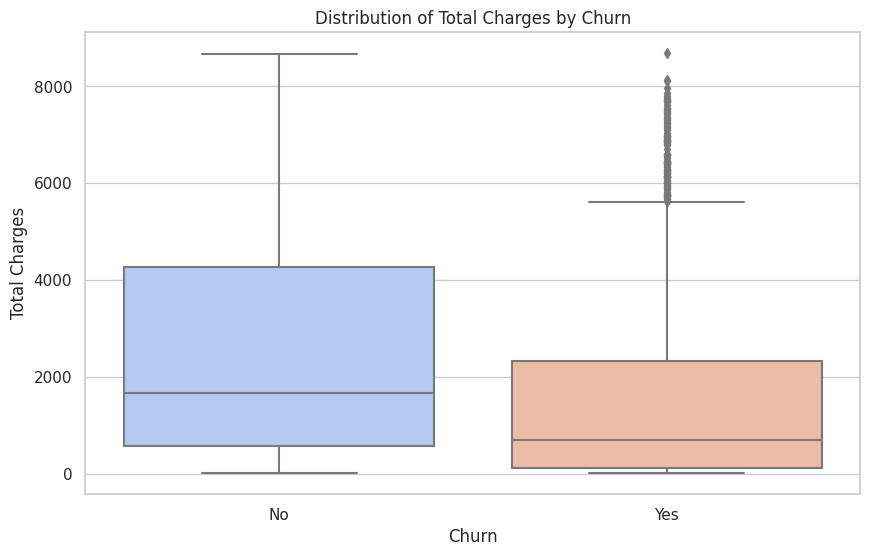

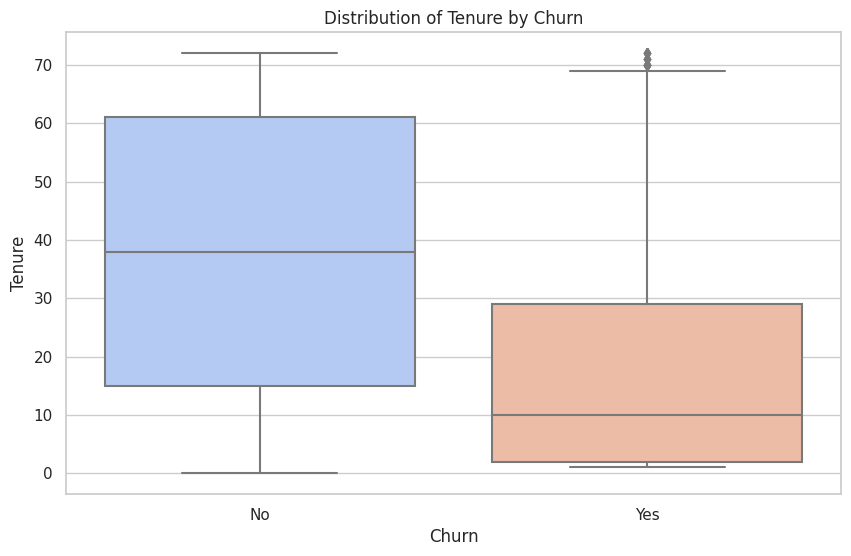

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# رسم رسم النقاط (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalCharges', y='tenure', hue='Churn', data=df, palette='coolwarm')
plt.title('Relationship between Total Charges and Tenure')
plt.xlabel('Total Charges')
plt.ylabel('Tenure')
plt.show()

# رسم الصندوق (box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='coolwarm')
plt.title('Distribution of Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

# رسم الصندوق (box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='coolwarm')
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


How many customers who doesn't have steaming Movies and left in the last month?

In [27]:
df[(df['Churn']=='Yes') & (df['StreamingMovies']=='No')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
18,4190-MFLUW,Female,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.20,30.20,Yes
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


How many customer have Streaming TV but don't have Streaming Movies?

In [28]:
df[(df['StreamingTV']=='Yes') & (df['StreamingMovies']=='No')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No
41,9489-DEDVP,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No
43,4671-VJLCL,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45,No
44,4080-IIARD,Female,0,Yes,No,13,Yes,Yes,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,76.20,981.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7028,9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [31]:
# Pandas profiling before data preprocessing
profile = ProfileReport(df, title='Pandas profiling before data preprcessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [32]:
# Convering pandas profiling info to html file
profile.to_file('data_train_before_preprocessing.html')

In [34]:
# تحويل البيانات الرقمية في عمود "TotalCharges" إلى سلسلة نصية
df['TotalCharges'] = df['TotalCharges'].astype(str)

In [35]:
# Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [36]:
print(df.nunique())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [38]:
# Data where tenure equals 0
df[df["tenure"]==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,nan,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,nan,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,nan,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,nan,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,nan,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,nan,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,nan,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,nan,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,nan,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,nan,No


<Figure size 2000x800 with 0 Axes>

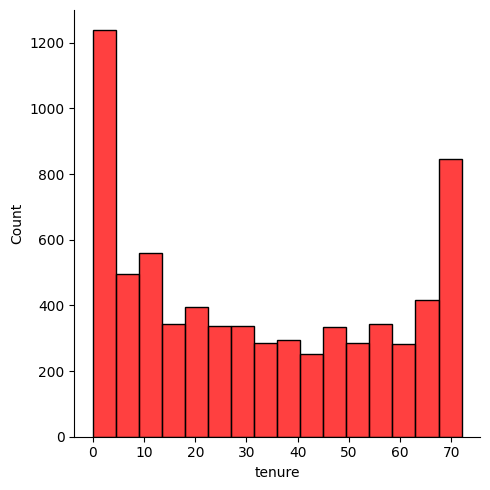

In [40]:
# Plotting tenure column with count
plt.figure(figsize=(20, 8))
sns.displot(df.tenure, color='red')
plt.show()

In [42]:
# Replace tenure 0 with mean since there are no extreme values
df['tenure']=df['tenure'].replace(0,df['tenure'].mean())

In [43]:
# Selecting columns of object data type
df.select_dtypes(include=object).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [44]:
# Dropping customerid columns as it is highly cardinal
df.drop("customerID",axis=1,inplace=True)

In [45]:
# Creating a copy of the dataset for label encoding
# cols variable storing the column names of the object data type columns
cols=df.select_dtypes(include=object).columns
# Importing the LabelEncoder class from sklearn.preprocessing module
from sklearn.preprocessing import LabelEncoder
# Creating a copy of the dataset
label_encoded_train=df.copy()
# Creating an instance of LabelEncoder
le=LabelEncoder()
# Iterating over each column in the 'cols' variable
for i in cols:
    # Applying label encoding to the selected column
    # The original column is replaced with the encoded values
    label_encoded_train[i]=le.fit_transform(label_encoded_train[i])

In [46]:
# Creating copy the label encoded data in data_train and displaying it
data_train=label_encoded_train.copy()
data_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2504,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1465,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,156,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1399,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,924,1


In [47]:
# Data information after data preprocessing
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [48]:
# Pandas profiling after data preprocessing
profile = ProfileReport(data_train, title='Pandas Profiling after Data Preprocessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

In [49]:
# Saving the obesvation from pandas profiling after data preprocessing
profile.to_file(output_file="data_train_after_preprocessing.html")

Text(0, 0.5, 'Churn')

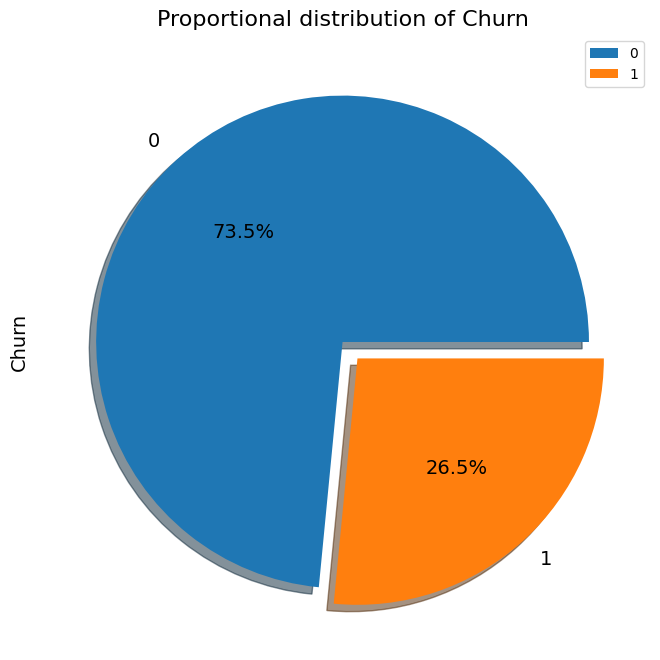

In [50]:
# Plotting the distribution of churn
# Plotting our dependent variable, y column
data_train['Churn'].value_counts().plot(kind='pie', legend=True,explode = [0, 0.09], autopct = "%3.1f%%", shadow = True, figsize=(8,8), fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn', fontsize=14)

<Axes: xlabel='PhoneService', ylabel='TotalCharges'>

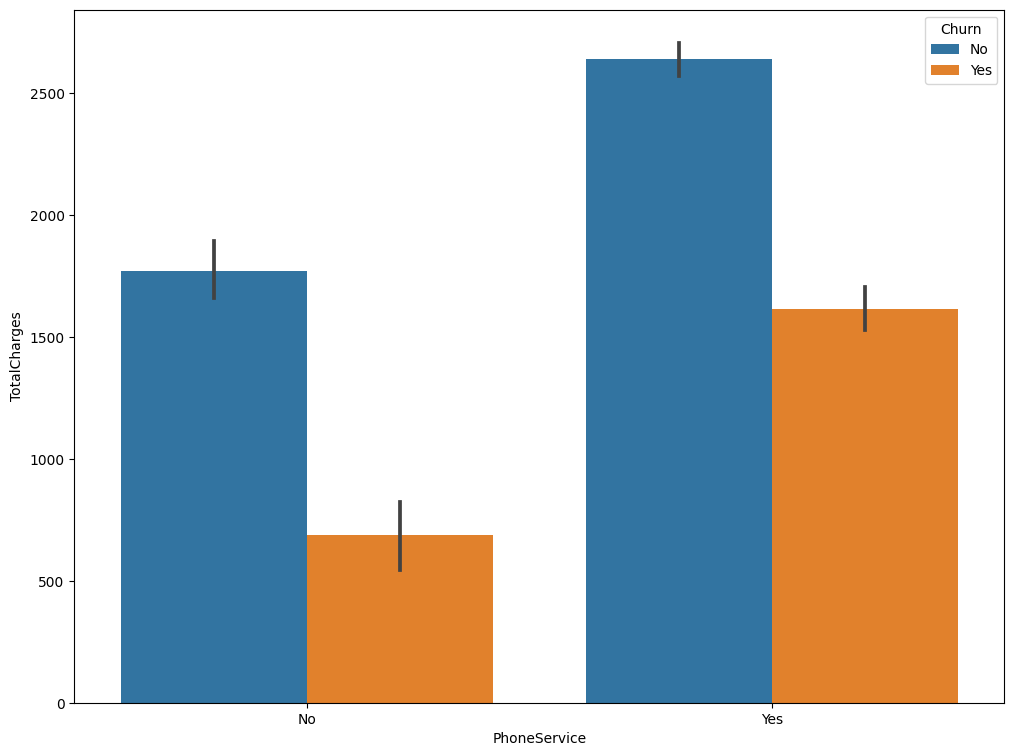

In [58]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# رسم العددية المقطعية
plt.figure(figsize=(12, 9))
sns.barplot(data=df, x='PhoneService', y='TotalCharges', hue='Churn')

In [59]:
# Number of customers who have active PhoneService
print(f"{len(df[df['PhoneService']=='Yes'])} have active PhoneService, which means -->")
# Percentage of customers who have active PhoneService out of the total number of customers
print(f"1. {round((len(df[df['PhoneService'] == 'Yes'])/len(df))*100, 2 )} % customers have Active Phone Service.")
# Percentage of customers with active PhoneService who have churned out of the total number of customers with active PhoneService
print(f"2. {round((len(df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]))/(len(df[df['PhoneService']=='Yes']))*100,2)} % of customers with Active Phone Sevice have Churned.")

6361 have active PhoneService, which means -->
1. 90.32 % customers have Active Phone Service.
2. 26.71 % of customers with Active Phone Sevice have Churned.


In [60]:
# Number of customers who have inactive PhoneService
print(f"{len(df[df['PhoneService'] == 'No'])} have inactive PhoneService, which means -->")
# Percentage of customers who have inactive PhoneService out of the total number of customers
print(f"1. {round((len(df[df['PhoneService'] == 'No'])/len(df))*100, 2 )} % customers have Deactivated Phone Service.")
# Percentage of customers with inactive PhoneService who have churned out of the total number of customers with active PhoneService
print(f"2. {round((len(df[(df['PhoneService']=='No') & (df['Churn']=='Yes')]))/(len(df[df['PhoneService']=='Yes']))*100,2)} % of customers with Deactivated Phone Sevice have Churned.")

682 have inactive PhoneService, which means -->
1. 9.68 % customers have Deactivated Phone Service.
2. 2.67 % of customers with Deactivated Phone Sevice have Churned.


<Axes: xlabel='PaymentMethod', ylabel='count'>

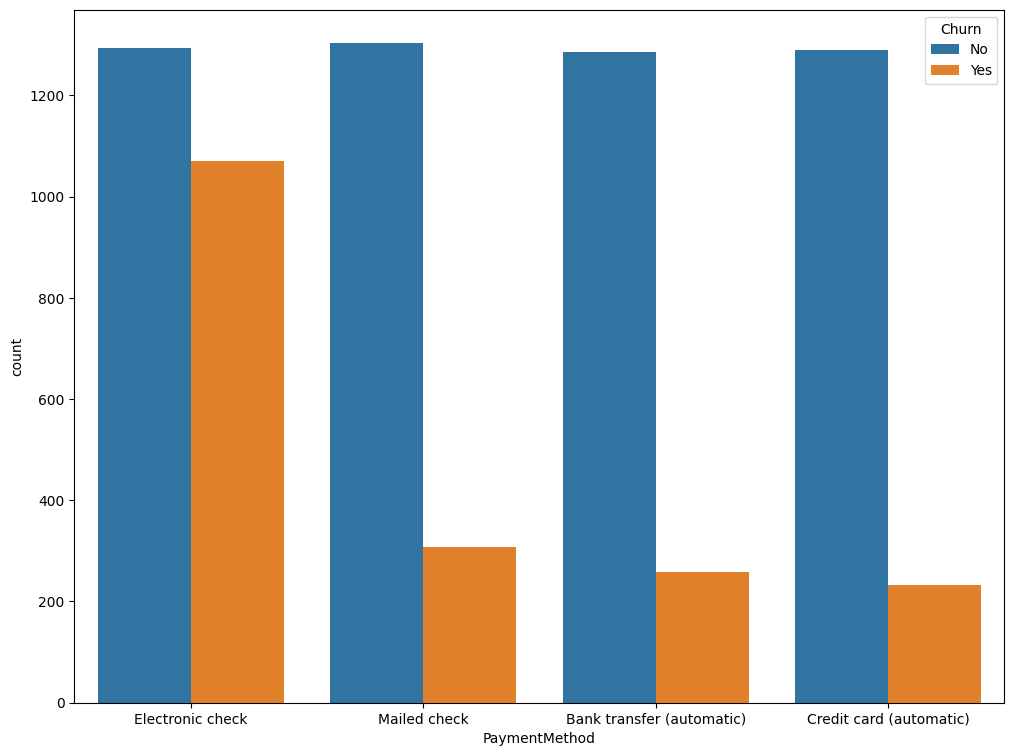

In [61]:
# Relation between PaymentMethod and Churn
plt.figure(figsize=(12,9))
sns.countplot(data=df,x='PaymentMethod', hue='Churn')

In [62]:
df[df['Churn']=='Yes']['PaymentMethod'].value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

Text(0, 0.5, 'Churn')

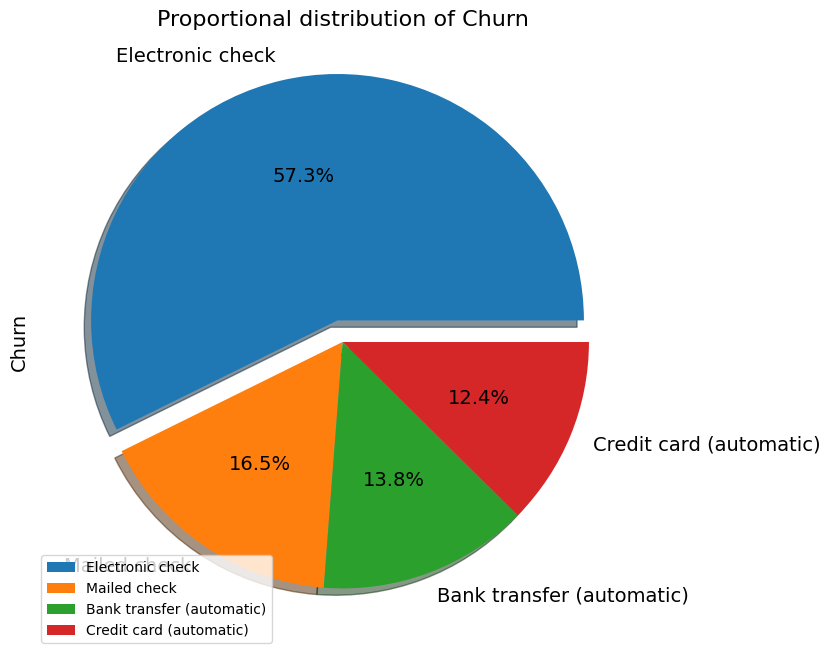

In [63]:
# Plotting the distribution of Paymenymethod where people churned
df[df['Churn']=='Yes']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],legend=True,autopct="%3.1f%%", shadow=True, figsize=(8,8),fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

Text(0, 0.5, 'Churn')

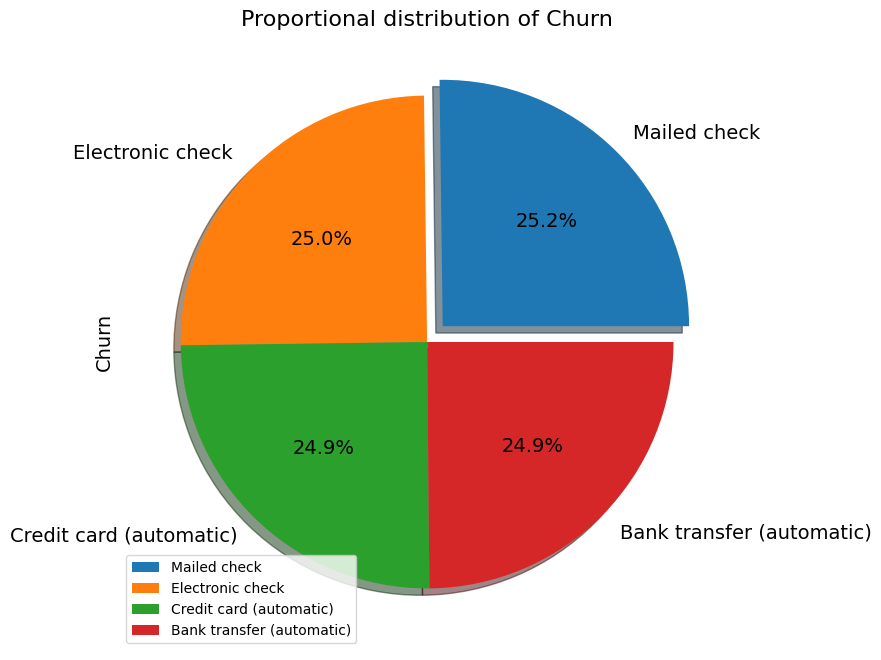

In [64]:
# Distribution of paymentmethod where people did not churn
df[df['Churn']=='No']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],legend=True,autopct="%3.1f%%",shadow=True,figsize=(8,8),fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

<Axes: >

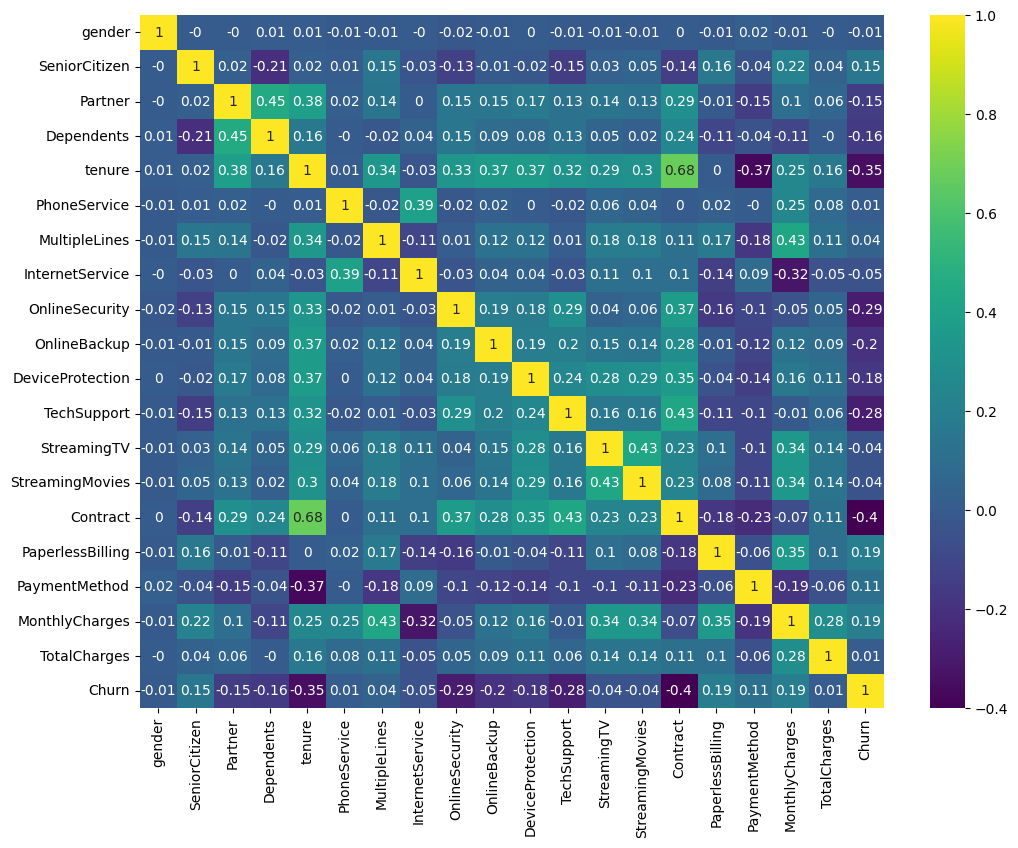

In [65]:
# Generating a heatmap plot of the correlation matrix for the label-encoded dataset
corr_mat=label_encoded_train.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,annot=True,cmap='viridis')

In [66]:
# Computing the correlation between the 'product_of_tenure_MonthCharges' column and the 'TotalCharges' column in the label-encoded dataset
# Creating a new column in the label-encoded dataset by multiplying the 'tenure' column with the 'MonthlyCharges' column then
# calculating the correlation between the newly created column 'product_of_tenure_MonthCharges' and the 'TotalCharges' column
label_encoded_train['product_of_tenure_MonthCharges']=label_encoded_train['tenure']*label_encoded_train['MonthlyCharges']
label_encoded_train[['product_of_tenure_MonthCharges', 'TotalCharges']].corr()

,product_of_tenure_MonthCharges,TotalCharges
product_of_tenure_MonthCharges,1.000000,0.346265
TotalCharges,0.346265,1.000000


In [70]:
# Display cleaned data
label_encoded_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [72]:
# Converting the cleaned data to csv
label_encoded_train.to_csv('Cleaned_Churn.csv')

In [73]:
# Loading the Cleaned Data
data=pd.read_csv("Cleaned_Churn.csv")

In [74]:
# Dropping the number column
data=data.drop("Unnamed: 0", axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1


In [75]:
# Separating the feature variables into 'X' by excluding the 'Churn' column, and assigns the target variable 'y' as the 'Churn' column
X=data.drop('Churn',axis=1)
y=data['Churn']

In [76]:
# Returning the shape (number of rows and columns) of the 'X' DataFrame
X.shape

(7043, 18)

In [77]:
# Returning the shape (number of rows and columns) of the 'y' DataFrame
y.shape

(7043,)

In [78]:
# Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1, random_state=1)

# **Model** **Building**

In [79]:
# Logistic regression
# Building a logistic regression model, performs cross-validation with 5-fold and 'roc_auc' scoring, and printing the scores along with their mean
log_model=LogisticRegression(max_iter=1000)
scores=cross_val_score(estimator=log_model,X=X_train,y=y_train,cv=5,scoring='roc_auc')
print(scores)
print("Mean",scores.mean())

[0.86158088 0.83710858 0.82183875 0.86144753 0.82743999]
Mean 0.8418831456868257


In [80]:
# Decision Tree
# Building a decision tree classifier with specific parameters, performs cross-validation with 5-fold and 'roc_auc' scoring, and printing the scores along with their mean
decision_tree=DecisionTreeClassifier(max_depth=9, random_state=123, splitter='best', criterion='gini')
scores=cross_val_score(estimator=decision_tree, X=X_train, y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean",scores.mean())

[0.78835731 0.77366411 0.74172279 0.78067147 0.7562732 ]
Mean 0.7681377785142743


In [81]:
# Random Forest
# Creating a random forest classifier with specified settings, performs cross-validation with 5-fold and 'roc_auc' scoring, and printing the scores along with their mean
model_rf=RandomForestClassifier()
model_rf=RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30)
scores=cross_val_score(estimator=model_rf,X=X_train,y=y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean", scores.mean())

[0.86704329 0.84198624 0.8246473  0.86135216 0.82828553]
Mean 0.8446629063372766


In [82]:
# Fitting the trainind data and target variable in random forest model
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

# **Checking Feature Importance**

In [83]:
# Checking the feature importances of various features
# Sorting the importances by descending order (lowest importance at the bottom)
for score, name in sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of Contract : 23.598028685530984 %
Feature importance of tenure : 20.951999473378766 %
Feature importance of OnlineSecurity : 13.059314481401568 %
Feature importance of TechSupport : 10.699118915637435 %
Feature importance of MonthlyCharges : 9.002827684059191 %
Feature importance of InternetService : 6.872590980689032 %
Feature importance of OnlineBackup : 4.247083679314023 %
Feature importance of PaymentMethod : 3.253727467573482 %
Feature importance of DeviceProtection : 2.6028654844926935 %
Feature importance of PaperlessBilling : 1.5933389757968355 %
Feature importance of SeniorCitizen : 0.721943733507695 %
Feature importance of MultipleLines : 0.6642085930579121 %
Feature importance of StreamingMovies : 0.6502068565636675 %
Feature importance of StreamingTV : 0.5973099735623425 %
Feature importance of Partner : 0.5033534614782514 %
Feature importance of Dependents : 0.475795643347248 %
Feature importance of PhoneService : 0.2557915135749996 %
Feature importance

In [84]:
model_rf.feature_importances_*100

array([ 0.2504944 ,  0.72194373,  0.50335346,  0.47579564, 20.95199947,
        0.25579151,  0.66420859,  6.87259098, 13.05931448,  4.24708368,
        2.60286548, 10.69911892,  0.59730997,  0.65020686, 23.59802869,
        1.59333898,  3.25372747,  9.00282768])

Text(0.5, 1.0, 'Feature Importance of each feature')

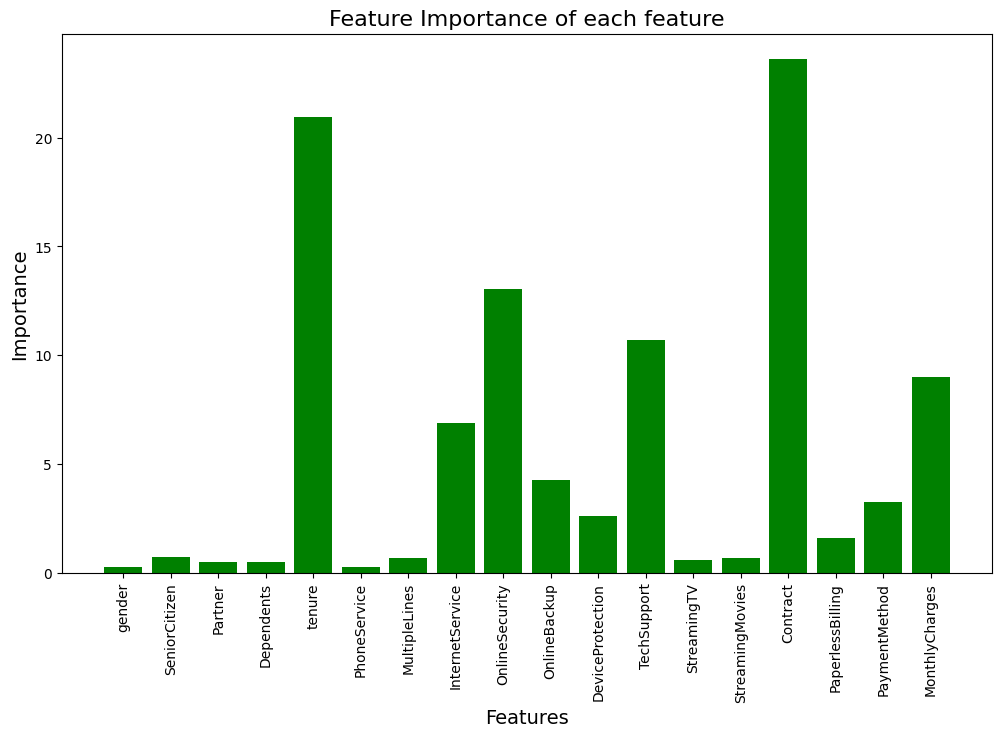

In [85]:
# Plotting the feature importance of each feature
plt.figure(figsize=(12,7))
plt.bar(X_train.columns,model_rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each feature', fontsize=16)

# **Hyperparameter Tuning**

In [86]:
# Defining a parameter grid for hyperparameter tuning with different values to be tested for 'n_estimators', 'max_depth', and 'max_features' hyperparameters
param_grid = [{'n_estimators': [100, 200, 300], 'max_depth': [None,2,3,10,20], 'max_features': ['sqrt',2,4,8,16,'log2', None]}]

In [87]:
# Creating a random forest classifier object 'temp_rf' with a random state of 0 and parallel processing enabled
temp_rf=RandomForestClassifier(random_state=0,n_jobs=-1)
# Creating a grid search object 'grid_search' using the 'GridSearchCV' function, with a random forest classifier as the estimator, a parameter grid, 'roc_auc' as the scoring metric, and 5-fold cross-validation with parallel processing
grid_search=GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [88]:
# Performing grid search on the training data to find the best hyperparameters for the model
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['sqrt', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [89]:
# Calculating the best RMSE score found by Grid Search
grid_search.best_score_

0.8411981960722225

In [90]:
# Retrieving the best parameter values found by the grid search
grid_search.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}

# **Final Model**

In [91]:
# Creating the final random forest model from the grid search's best estimator
final_rf=grid_search.best_estimator_

In [92]:
# Fitting the final model with training set
final_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1,
                       random_state=0)

In [93]:
# Making predictions on the train set
y_train_pred=final_rf.predict(X_train)

In [94]:
# Making predictions on the test set
y_test_pred=final_rf.predict(X_test)

# **Saving the Model as Pickle String**

In [95]:
import pickle
pickle.dump(final_rf,open('randomforest.pkl','wb'))

# **Model Evaluation**

**Confusion** **Matrix**

In [96]:
# Confusion Matrix for y_test and y_test_pred
confusion_mat=pd.DataFrame(confusion_matrix(y_test, y_test_pred))

In [97]:
# Assigning custom index and column labels to a confusion matrix DataFrame and displaying the confusion matrix
confusion_mat.index=['Actual Negative', 'Actual Positive']
confusion_mat.columns=['Predicted Negative', 'Predicted Positive']
confusion_mat

,Predicted Negative,Predicted Positive
Actual Negative,478,55
Actual Positive,78,94


**Accuracy Score**

In [98]:
# Accuracy score on the training set
print('Accuracy score for train data is:', accuracy_score(y_train, y_train_pred))

Accuracy score for train data is: 0.8818239192174188


In [99]:
# Accuracy score on the test set.
print('Accuracy score for test data is:', accuracy_score(y_test, y_test_pred))

Accuracy score for test data is: 0.8113475177304964


**Precision Score**

In [100]:
# Precision score on the training set
print('Accuracy score for train data is:', precision_score(y_train, y_train_pred))

Accuracy score for train data is: 0.8224489795918367


In [101]:
# Precision score on the test set.
print('Accuracy score for test data is:', precision_score(y_test, y_test_pred))

Accuracy score for test data is: 0.6308724832214765


**Recall Score**

In [102]:
# recall score on the training set
print('Accuracy score for train data is:', recall_score(y_train, y_train_pred))

Accuracy score for train data is: 0.7124337065409546


In [103]:
# recall score on the test set.
print('Accuracy score for test data is:', recall_score(y_test, y_test_pred))

Accuracy score for test data is: 0.5465116279069767
